<a href="https://colab.research.google.com/github/danielsmithdevelopment/python-group-programming/blob/python-for-finance/python-for-finance/portfolio_optimization_intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Description: Program attempts to optimize a user's portfolio using Efficient Frontier

In [2]:
pip install PyPortfolioOpt

     |████████████████████████████████| 51kB 1.6MB/s 


In [3]:
# Import libraries
from pandas_datareader import data as web
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

/usr/local/lib/python3.6/dist-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [83]:
# Get stock symbols/tickers in portfolio
assets = ['SPYG', 'QQQ', 'VYMI', 'SLV', 'GLD', 'ARKK', 'ARKF', 'ARKQ']

In [84]:
# Get the stock/portfolio starting date
stockStartDate = '2020-01-01'

In [85]:
# Get the stock/portfolio ending date
today = datetime.today().strftime('%Y-%m-%d')

In [86]:
# Create a dataframe to store the adjusted close price of stocks
df = pd.DataFrame()

# Store the adjusted close price of the stock into the dataframe
for stock in assets:
  df[stock] = web.DataReader(stock, data_source='yahoo', start = stockStartDate, end = today)['Adj Close']

In [87]:
# Show dataframe
df

,SPYG,QQQ,VYMI,SLV,GLD,ARKK,ARKF,ARKQ
Date,,,,,,,,
2020-01-02,42.201527,215.325897,64.059685,16.809999,143.949997,50.500000,24.570000,37.891998
2020-01-03,41.893700,213.353516,63.148792,16.840000,145.860001,50.130001,24.299999,37.797001
2020-01-06,42.092300,214.728195,63.267605,16.940001,147.389999,50.520000,24.459999,37.842999
2020-01-07,42.052578,214.698303,63.089386,17.170000,147.970001,51.139999,24.680000,38.310001
2020-01-08,42.320686,216.312057,63.158695,16.930000,146.860001,52.290001,24.879999,38.869999
...,...,...,...,...,...,...,...,...
2020-08-24,51.110001,283.630005,54.869999,24.600000,181.000000,88.459999,39.000000,56.349998
2020-08-25,51.410000,285.859985,55.028000,24.760000,181.220001,89.500000,39.419998,57.549999
2020-08-26,52.380001,291.959991,55.160000,25.570000,183.360001,91.400002,39.990002,58.669998


In [88]:
# Show the daily simple return
returns = df.pct_change()
returns

,SPYG,QQQ,VYMI,SLV,GLD,ARKK,ARKF,ARKQ
Date,,,,,,,,
2020-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-03,-0.007294,-0.009160,-0.014219,0.001785,0.013269,-0.007327,-0.010989,-0.002507
2020-01-06,0.004741,0.006443,0.001881,0.005938,0.010490,0.007780,0.006584,0.001217
2020-01-07,-0.000944,-0.000139,-0.002817,0.013577,0.003935,0.012272,0.008994,0.012341
2020-01-08,0.006376,0.007516,0.001099,-0.013978,-0.007502,0.022487,0.008104,0.014618
...,...,...,...,...,...,...,...,...
2020-08-24,0.008286,0.006244,0.012362,-0.012048,-0.005658,-0.015251,0.005932,0.010944
2020-08-25,0.005870,0.007862,0.002880,0.006504,0.001215,0.011757,0.010769,0.021295
2020-08-26,0.018868,0.021339,0.002399,0.032714,0.011809,0.021229,0.014460,0.019461


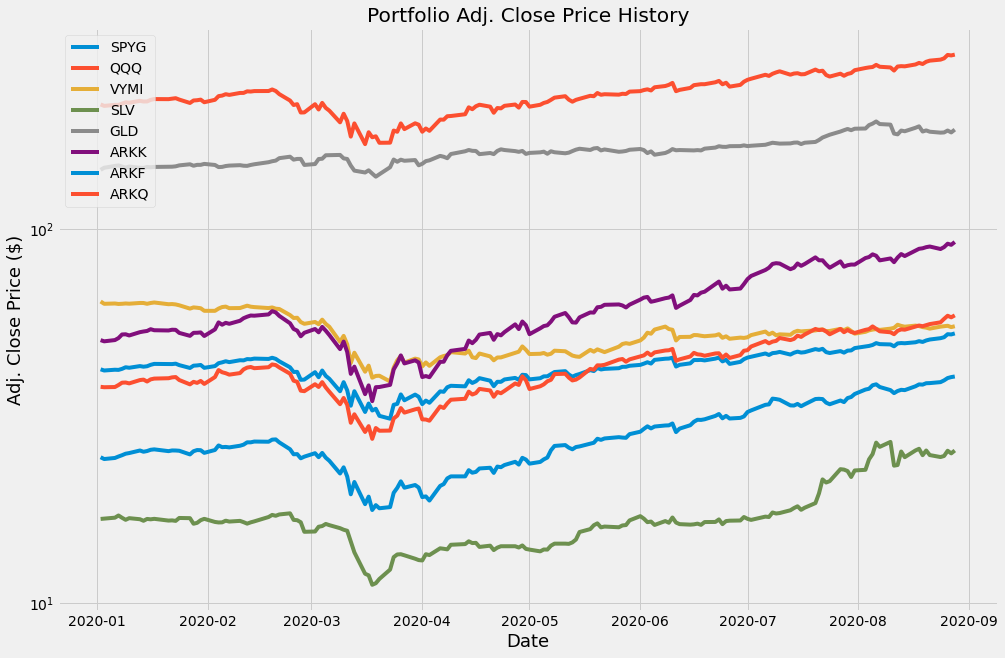

In [89]:
# Visually show the stock/portfolio
title = 'Portfolio Adj. Close Price History'

# Get the stocks
my_stocks = df
# my_stocks = returns

# Create and plot the graph
for c in my_stocks.columns.values:
  plt.plot(my_stocks[c], label = c)

plt.title(title)
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Adj. Close Price ($)', fontsize = 18)
plt.yscale("log")
plt.legend(my_stocks.columns.values, loc='upper left')
plt.rcParams["figure.figsize"] = (15,10)
plt.show()

In [90]:
# Create and show the annualized covariance matrix
cov_matrix_annual = returns.cov() * 252
cov_matrix_annual

,SPYG,QQQ,VYMI,SLV,GLD,ARKK,ARKF,ARKQ
SPYG,0.159279,0.156336,0.136344,0.060602,0.013057,0.184756,0.159874,0.158060
QQQ,0.156336,0.158635,0.128030,0.063360,0.016130,0.184513,0.158214,0.155811
VYMI,0.136344,0.128030,0.148429,0.061467,0.011679,0.170067,0.144942,0.147926
SLV,0.060602,0.063360,0.061467,0.213065,0.073981,0.105269,0.080624,0.075892
GLD,0.013057,0.016130,0.011679,0.073981,0.045008,0.024691,0.020861,0.014572
ARKK,0.184756,0.184513,0.170067,0.105269,0.024691,0.286452,0.215350,0.223708
ARKF,0.159874,0.158214,0.144942,0.080624,0.020861,0.215350,0.187055,0.174474
ARKQ,0.158060,0.155811,0.147926,0.075892,0.014572,0.223708,0.174474,0.199297


In [91]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

In [98]:
# Portfolio Optimization

# Calculate the expected returns and annualized sample covariance matrix of asset returns
mu = expected_returns.mean_historical_return(df, compounding=True)
S = risk_models.sample_cov(df)

# Optimize for maximum Sharpe Ratio
ef = EfficientFrontier(mu, S, weight_bounds=(0.05,0.2))
weights = ef.max_sharpe(risk_free_rate=0.01)
ef.save_weights_to_file('weights.csv')
cleaned_weights = ef.clean_weights()
print(cleaned_weights)
ef.portfolio_performance(verbose = True)

OrderedDict([('SPYG', 0.05), ('QQQ', 0.05), ('VYMI', 0.05), ('SLV', 0.2), ('GLD', 0.2), ('ARKK', 0.2), ('ARKF', 0.2), ('ARKQ', 0.05)])
Expected annual return: 107.7%
Annual volatility: 33.4%
Sharpe Ratio: 3.17


(1.0774232318660117, 0.33368845277835707, 3.1688936882942564)

In [99]:
# Get the discrete allocation of each share per stock
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices

latest_prices = get_latest_prices(df)
weights = cleaned_weights
da = DiscreteAllocation(weights, latest_prices, total_portfolio_value = 15000)

allocation, leftover = da.lp_portfolio()
print('Discrete allocation:', allocation)
print('Funds remaining: ${:.2f}'.format(leftover))

Discrete allocation: {'SPYG': 14.0, 'QQQ': 3.0, 'VYMI': 13.0, 'SLV': 117.0, 'GLD': 16.0, 'ARKK': 32.0, 'ARKF': 74.0, 'ARKQ': 13.0}
Funds remaining: $15.48
